In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras import Sequential
from tensorflow.keras.layers import GlobalMaxPooling2D, Dense, Dropout
from tensorflow.keras.applications.efficientnet import EfficientNetB7, preprocess_input

In [4]:
# use efficientnetb7 for feature extraction
base_model = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# for layer in model.layers:
    # layer.trainable = False

base_model.trainable = False

In [5]:
# make a new sequential model
model = Sequential([base_model, GlobalMaxPooling2D()])

# build the model
model.build(input_shape=(None, 224, 224, 3))

# compile the model
model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [6]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb7 (Functional)     │ (None, 7, 7, 2560)     │    64,097,687 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d            │ (None, 2560)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64,097,687 (244.51 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 64,097,687 (244.51 MB)

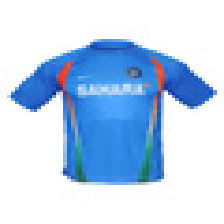

In [ ]:
# load image
img_path = './data/images/1163.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img

In [7]:
import pandas as pd
import numpy as np
from numpy.linalg import norm

In [ ]:
# preprocess image
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, 0)
img_array = preprocess_input(img_array)

In [ ]:
# predict image
pred = model.predict(img_array)
pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step


array([[2.0187728 , 0.69735575, 3.7913942 , ..., 0.7533477 , 0.2207194 ,
        4.5425496 ]], dtype=float32)

In [ ]:
pred.flatten()

array([2.0187728 , 0.69735575, 3.7913942 , ..., 0.7533477 , 0.2207194 ,
       4.5425496 ], dtype=float32)

In [ ]:
norm(pred.flatten())

110.36305

In [ ]:
pred.shape

(1, 2560)

In [8]:
def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    res = model.predict(preprocessed_img, verbose=0).flatten()
    return res / norm(res) # L2 Normalization

In [9]:
df = pd.read_csv('preprocessed.csv')
df.head()

,id,gender,masterCategory,label,subCategory,articleType,baseColour,usage,season,productDisplayName,simplifiedColor
0,1163,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Sahara Team India Fanwear Round Neck Jersey,Neutral
1,1164,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Winter,Nike Men Blue T20 Indian Cricket Jersey,Neutral
2,1165,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Mean Team India Cricket Jersey,Neutral
3,1525,Unisex,Accessories,1,Bags,Backpacks,Navy Blue,Casual,Fall,Puma Deck Navy Blue Backpack,Dark
4,1526,Unisex,Accessories,1,Bags,Backpacks,Black,Sports,Fall,Puma Big Cat Backpack Black,Dark


In [ ]:
df.head()

,id,gender,masterCategory,label,subCategory,articleType,baseColour,usage,season,productDisplayName,simplifiedColor
0,1163,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Sahara Team India Fanwear Round Neck Jersey,Neutral
1,1164,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Winter,Nike Men Blue T20 Indian Cricket Jersey,Neutral
2,1165,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Mean Team India Cricket Jersey,Neutral
3,1525,Unisex,Accessories,1,Bags,Backpacks,Navy Blue,Casual,Fall,Puma Deck Navy Blue Backpack,Dark
4,1526,Unisex,Accessories,1,Bags,Backpacks,Black,Sports,Fall,Puma Big Cat Backpack Black,Dark


In [ ]:
# each image path is present in ./data/images/id.jpg format. this id is a column in df
df['image_path'] = df['id'].apply(lambda x: f'./data/images/{x}.jpg')

In [ ]:
df.head()

,id,gender,masterCategory,label,subCategory,articleType,baseColour,usage,season,productDisplayName,simplifiedColor,image_path
0,1163,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Sahara Team India Fanwear Round Neck Jersey,Neutral,./data/images/1163.jpg
1,1164,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Winter,Nike Men Blue T20 Indian Cricket Jersey,Neutral,./data/images/1164.jpg
2,1165,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Mean Team India Cricket Jersey,Neutral,./data/images/1165.jpg
3,1525,Unisex,Accessories,1,Bags,Backpacks,Navy Blue,Casual,Fall,Puma Deck Navy Blue Backpack,Dark,./data/images/1525.jpg
4,1526,Unisex,Accessories,1,Bags,Backpacks,Black,Sports,Fall,Puma Big Cat Backpack Black,Dark,./data/images/1526.jpg


In [ ]:
# %pip install --upgrade jupyter ipywidgets

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!jupyter nbextension enable --py widgetsnbextension

In [11]:
from tqdm.notebook import tqdm

In [12]:
feature_list = []
image_paths = []

df_mini = df.head(10)

In [ ]:
df_mini.head()

,id,gender,masterCategory,label,subCategory,articleType,baseColour,usage,season,productDisplayName,simplifiedColor,image_path
0,1163,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Sahara Team India Fanwear Round Neck Jersey,Neutral,./data/images/1163.jpg
1,1164,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Winter,Nike Men Blue T20 Indian Cricket Jersey,Neutral,./data/images/1164.jpg
2,1165,Men,Apparel,0,Topwear,Tshirts,Blue,Sports,Summer,Nike Mean Team India Cricket Jersey,Neutral,./data/images/1165.jpg
3,1525,Unisex,Accessories,1,Bags,Backpacks,Navy Blue,Casual,Fall,Puma Deck Navy Blue Backpack,Dark,./data/images/1525.jpg
4,1526,Unisex,Accessories,1,Bags,Backpacks,Black,Sports,Fall,Puma Big Cat Backpack Black,Dark,./data/images/1526.jpg


In [13]:
for id in tqdm(df['id']):
    # find id from i
    # id = df_mini.iloc[i]['id']
    image_path = f"./data/images/{id}.jpg"
    # print(image_path)
    features = extract_features(image_path)
    feature_list.append(features)
    image_paths.append(image_path)

  0%|          | 0/39685 [00:00<?, ?it/s]

In [ ]:
features = np.array(feature_list)
features.shape

(10, 2560)

In [ ]:
image_paths = np.array(image_paths)
image_paths.shape

(10,)

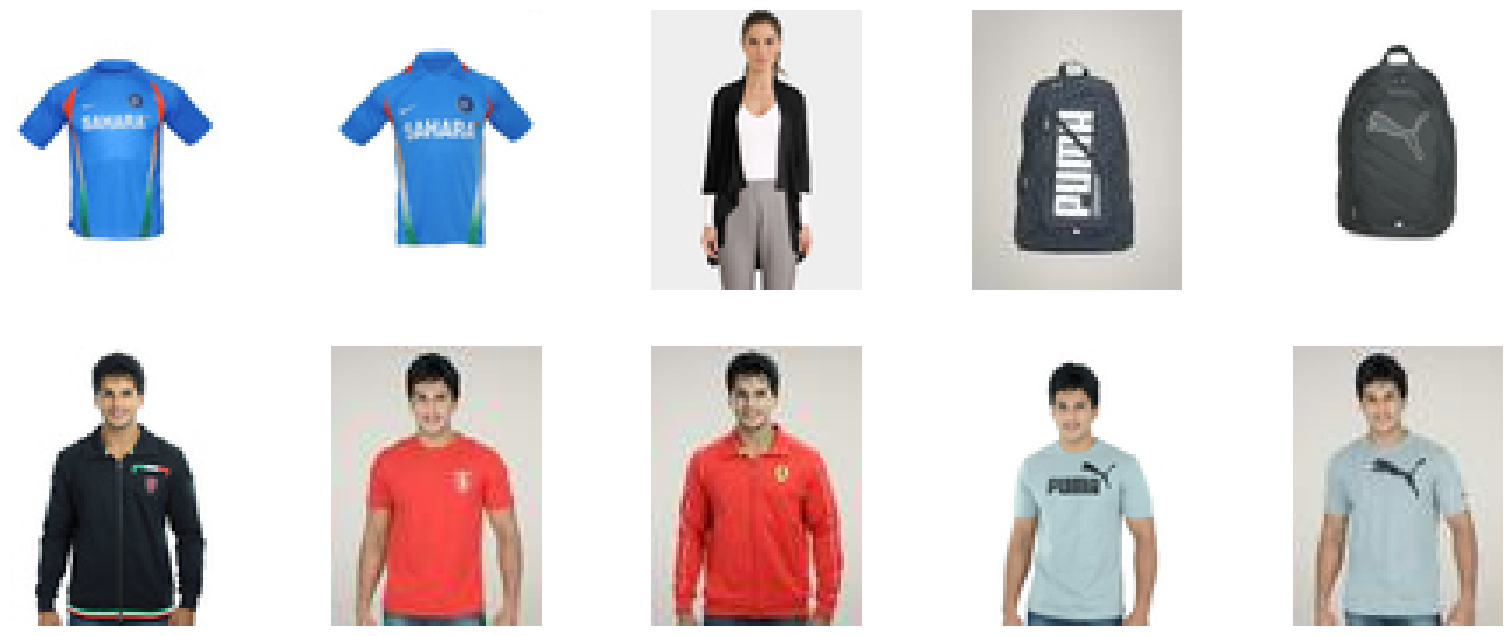

In [ ]:
# display all images in a grid
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()

for i, img_path in enumerate(image_paths):
    img = mpimg.imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()